In [1]:
3 + 2j

(3+2j)

In [2]:
a = 3
b = 3
z = a + b * 1j
print('z= ', z)

z=  (3+3j)


In [3]:
print('The type of the variable is ', type(z))

The type of the variable is  <class 'complex'>


In [4]:
(2.75+3.69j)*(8.55-6.13j)

(46.1322+14.692000000000004j)

In [5]:
import math
import numpy
1.4 * numpy.exp(5.32j)

(0.79927078585823497-1.1494199453957457j)

In [6]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

In [7]:
import numpy
R = 1.5
theta = numpy.linspace(0, 2*math.pi, 100)
x = R*numpy.cos(theta)
y = R*numpy.sin(theta)
c = 1.0

In [8]:
def get_E(x, y):

    z = x + y*1j
    E = z + c**2/z
    
    return E

In [9]:
E1 = get_E(x, y)
numpy.shape(E1)

(100,)

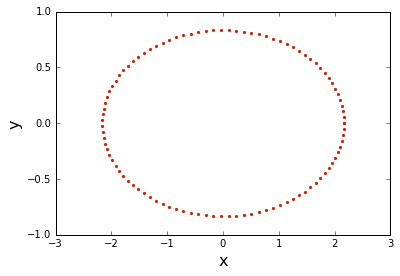

In [10]:
from matplotlib import pyplot
%matplotlib inline
size = 10
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(E1.real,E1.imag, s=10, color='#CD2305', marker='o', linewidth=0)

In [11]:
R2 = 1.2


theta = numpy.linspace(0, 2*math.pi, 100)
x2 = R2*numpy.cos(theta)+(c-R2)
y2 = R2*numpy.sin(theta)

E2 = get_E(x2, y2)

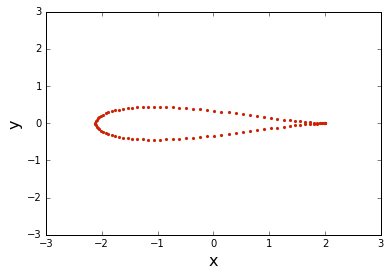

In [12]:

size = 10
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(E2.real,E2.imag, s=10, color='#CD2305', marker='o', linewidth=0)

In [13]:
delta_x, delta_y = -0.1, 0.1
R3 = ((c-delta_x)**2+delta_y**2)**0.5

theta = numpy.linspace(0, 2*math.pi, 100)
x3 = R3*numpy.cos(theta)+delta_x
y3 = R3*numpy.sin(theta)+delta_y

E3 = get_E(x3, y3)

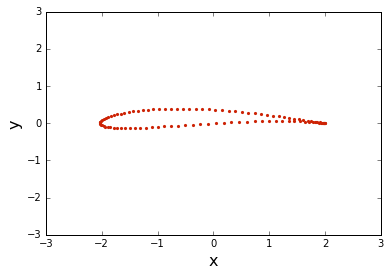

In [14]:

size = 10
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(E3.real,E3.imag, s=10, color='#CD2305', marker='o', linewidth=0)

In [15]:
delta_x, delta_y = -0.15, 0
R4 = 1.15

r = numpy.linspace(R4, 5, 100)
theta1 = numpy.linspace(0, 2*math.pi, 145)
R, THETA = numpy.meshgrid(r, theta1)

x4 = R*numpy.cos(THETA)+delta_x
y4 = R*numpy.sin(THETA)+delta_y

numpy.shape(x4)

(145, 100)

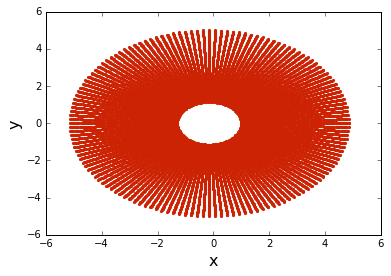

In [16]:
size = 10
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(x4,y4, s=10, color='#CD2305', marker='o', linewidth=0)

In [17]:
E4 = get_E(x4, y4)
numpy.shape(E4)

(145, 100)

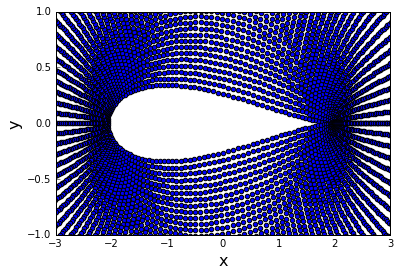

In [18]:

size = 10
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-1.0, 1.0)
pyplot.scatter(E4.real,E4.imag, s=10, color='#CD2305', marker='o', linewidth=0)
pyplot.scatter(E4.real,E4.imag)

In [19]:
u_inf = 1.0
R5 = 1.15
kappa = R5**2*2*math.pi*u_inf
kappa

8.309512568745001

In [28]:
r = numpy.linspace(R4, 5, 100)
theta1 = numpy.linspace(0, 2*math.pi, 145)
R, THETA = numpy.meshgrid(r, theta1)

x4 = R*numpy.cos(THETA)+delta_x
y4 = R*numpy.sin(THETA)+delta_y

numpy.shape(x4)

(145, 100)

In [20]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """Returns the velocity field generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """Returns the stream-function generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [21]:
# computes the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, delta_x, delta_y, x4, y4)

# computes the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, delta_x, delta_y, x4, y4)

# freestream velocity components
u_freestream = u_inf * numpy.ones((145, 100), dtype=float)
v_freestream = numpy.zeros((145, 100), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * y4

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

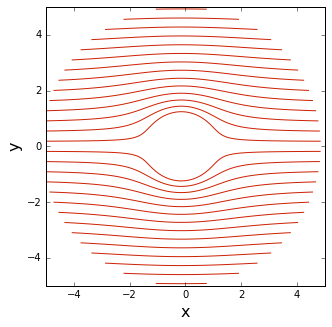

In [43]:
# plots the streamlines
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5.0,5.0)
pyplot.ylim(-5.0,5.0)
pyplot.contour(x4, y4, psi, levels = numpy.linspace(-5,5,30),colors='#CD2305', linewidths=1, linestyles='solid')

In [45]:
E5 = get_E(x4, y4)
numpy.shape(E5)

(145, 100)

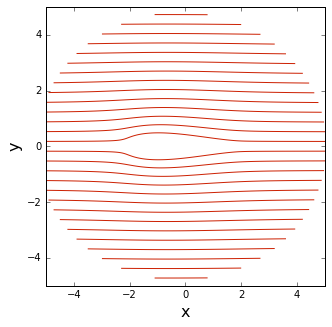

In [47]:
# plots the streamlines
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5.0,5.0)
pyplot.ylim(-5.0,5.0)
pyplot.contour(E5.real, E5.imag, psi, levels = numpy.linspace(-5,5,30),colors='#CD2305', linewidths=1, linestyles='solid')